# Wine quality prediction using Machine Learning

This model has **its own modifications**; however, it is based on the tutorial specified in the following URL.

https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/?ref=lbp

Here we will predict the quality of wine on the basis of given features. We use the wine quality dataset available on Internet for free. This dataset has some fundamental features which may the quality of the wine. We will predict the quality of the wine using different machine learning algorithms.

## Importing libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

## Uploading the dataset
In the tutorial, it is mentioned that the dataset can be freely accessed on the internet. It is available at the following URL

https://archive.ics.uci.edu/dataset/186/wine+quality

We can download both the dataset and install the module developed by UC Irvine to work with their data in Python. In this case, I have downloaded it, but I will now attempt the installation of the module for importing the data, as it may prove more convenient for working with Google Colab.

In [38]:
pip install ucimlrepo #-> Once installed, set as a comment! Do not comment in Google Colab

In [39]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

## Exploratory Data Analysis

For the exploratory data analysis, if we observe the code we have used based on the instructions from the UC Irvine website, it has already split the dataset into two pandas dataframes, X and Y. X serves as the dataframe for features, and Y for targets, saving us several steps

In [40]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [41]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


Even though I have separated X and y into two dataframes, I can continue performing the typical observations made in exploratory data analysis.

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


We observe that the number of non-null values in each variable matches the number of values (row index) in our dataframe, indicating that we do not have any problematic values such as NaN that could pose issues.

In [43]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In the tutorial, it was mentioned that there were several null values, and they addressed this by imputing the mean of the values. However, upon executing X.isnull().sum(), it can be verified that the dataframe does not currently contain any non-null values, aligning with the output displayed when running X.info().

In [44]:
X.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

We are going to plot histograms of the variables within the dataframe to observe their distributions.

The tutorial also includes the graph corresponding to quality. However, the graph is not visible here since I have separated the dataset into two dataframes during the EDA

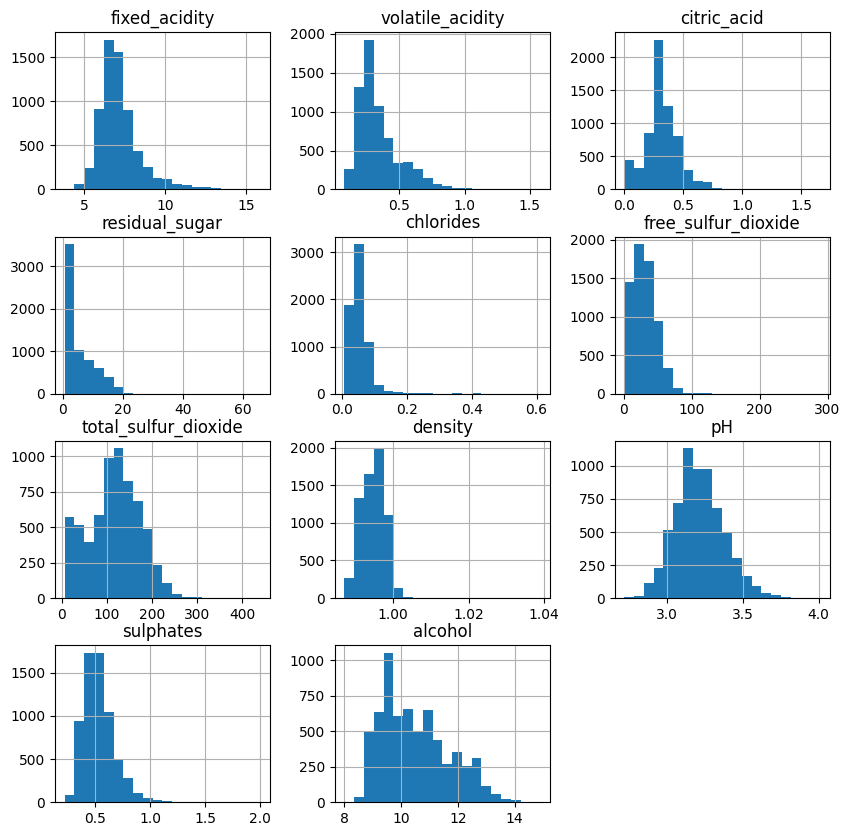

In [45]:
X.hist(bins=20, figsize=(10, 10))
plt.show()

Now we plot the quality ratings against the alcohol content of the wines.

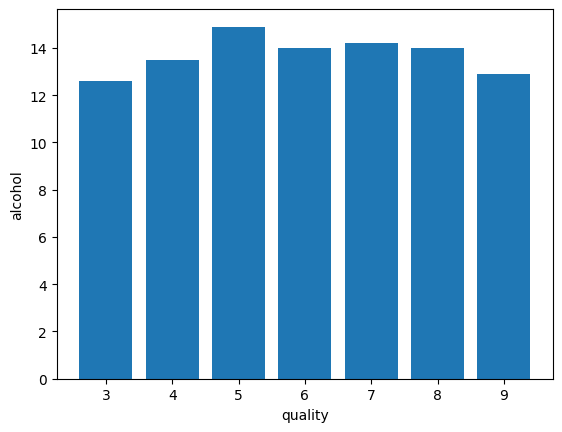

In [46]:
plt.bar(y['quality'], X['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

Next, we will check through a correlation map if there are redundant variables that are not contributing to the analysis of wine quality.

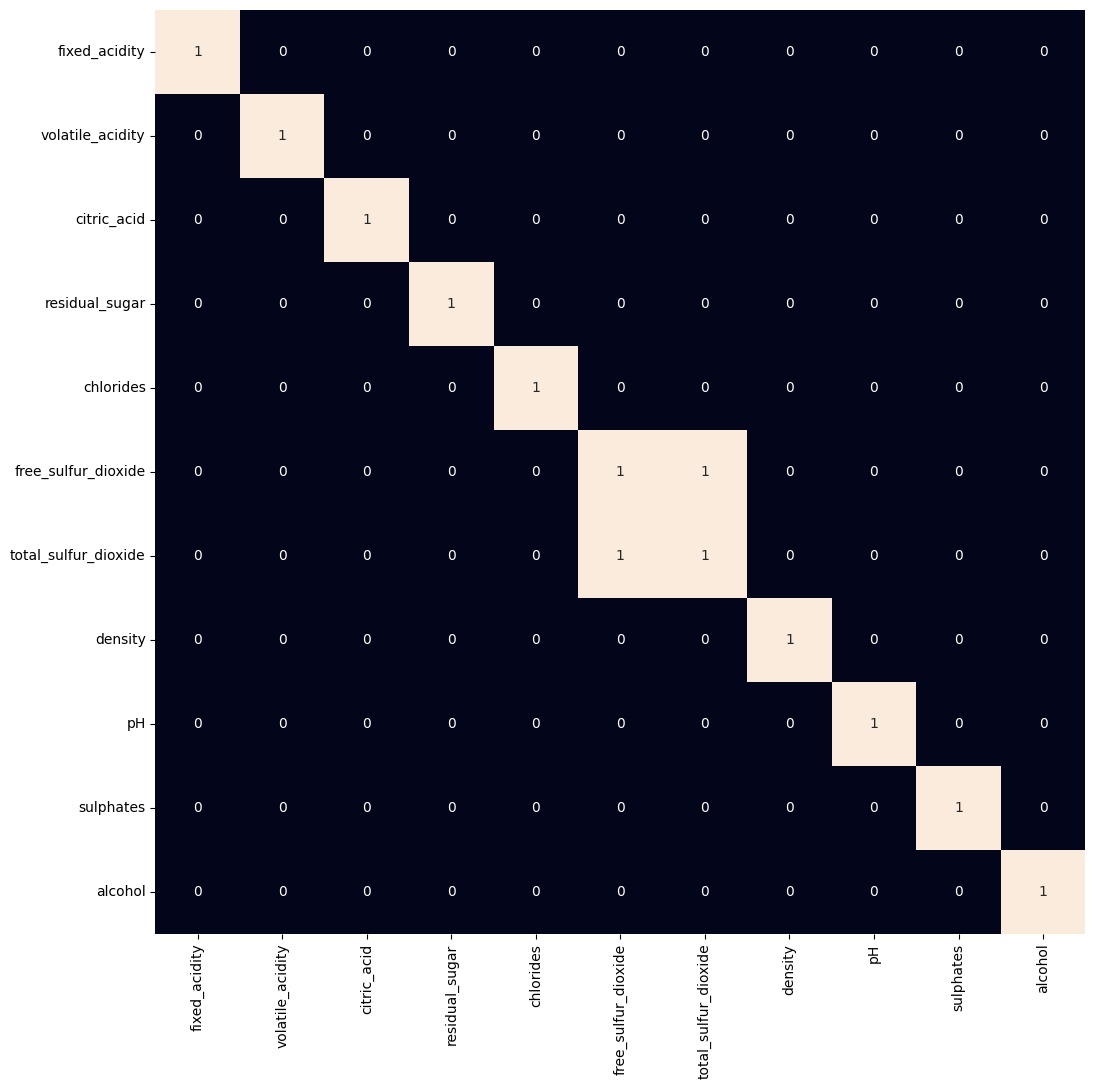

In [47]:
plt.figure(figsize=(12, 12))
sb.heatmap(X.corr() > 0.7, annot=True, cbar=False)
plt.show()

In the heat map, a strong correlation is observed between the variables 'free sulphur dioxide' and 'total sulphur dioxide.' This is due to the evident dependence between both variables. As this dependence does not contribute to our analysis, we will remove the 'total sulphur dioxide' variable from the dataframe.

In [48]:
X = X.drop('total_sulfur_dioxide', axis=1)

## Model development

In this tutorial, they use a classification model by categorizing the score values obtained for wine quality. For this purpose, they label the 'quality' column with the value 1 if the quality rating is greater than or equal to 5, and 0 otherwise. However, in the tutorial, they introduce the condition 'x > 5,' so the value 5 would not be included as category 1. From my perspective, the classification would be slightly unbalanced toward labels with a value of 0. In this case, I will modify the condition to 'x >= 5.

In [49]:
y['best quality'] = [1 if x >= 5 else 0 for x in y.quality]


Next, we are going to perform another categorization, this time on the dataframe X, which contains the features evaluated to study the model. In this case, the labels will be classified based on whether it is white wine or red wine.

In [50]:
X.replace({'white': 1, 'red': 0}, inplace=True)

In the training and test data split, the tutorial separates the variables corresponding to the quality from the main dataframe. Since I imported the data directly from the dataset source URL using the library provided on the UC Irvine website, I need to modify this step according to my dataframes.

We will apply a data split in a ratio of 80:20, as indicated in the tutorial, which is quite common when training models.

In [51]:
target = y['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
	X, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape

((5197, 10), (1300, 10))

In [52]:
xtrain.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol
908,7.4,0.52,0.13,2.4,0.078,34.0,0.99528,3.43,0.59,10.8
3131,7.5,0.23,0.49,7.7,0.049,61.0,0.99410,3.14,0.30,11.1
2585,7.4,0.28,0.30,5.3,0.054,44.0,0.99410,3.12,0.48,10.3
3375,6.6,0.25,0.35,14.0,0.069,42.0,0.99900,3.56,0.47,9.8
4444,6.5,0.22,0.29,7.4,0.028,16.0,0.99311,3.15,0.56,10.9


We normalize the data to achieve a more stable and faster training. We will use the MinMaxScaler method to normalize the data with respect to its maximum and minimum values.

In [53]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

Once the data is prepared, we will apply three different models to then evaluate the results. In this case, we will apply logistic regression, XGB Classifier, and SVC Classifier.

In [54]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
	models[i].fit(xtrain, ytrain)

	print(f'{models[i]} : ')
	print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
	print('Validation Accuracy : ', metrics.roc_auc_score(
		ytest, models[i].predict(xtest)))
	print()

LogisticRegression() : 
Training Accuracy :  0.5
Validation Accuracy :  0.5

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.5736946120241314

SVC() : 
Training Accuracy :  0.505
Validation Accuracy :  0.5



## Model Evaluation

The results obtained differ from those presented in the tutorial. While in the tutorial, it is observed that the best models are logistic regression and SVC classifier, in this case, it appears that the best results are obtained using **XGB classifier**. This could be due to the database being updated after the tutorial was created.

Now, we represent the confusion matrix of the obtained results.

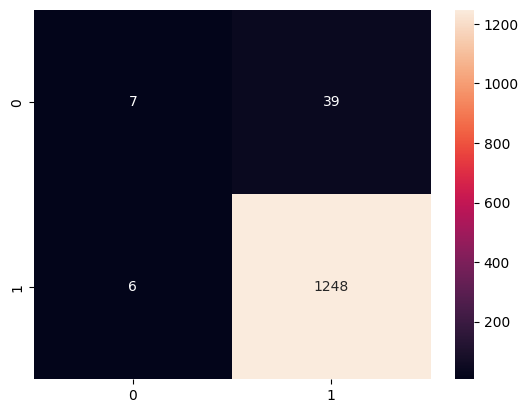

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(ytest, models[1].predict(xtest))

sns.heatmap(cm, annot=True, fmt="d")
plt.show()

We print the classification report to observe the performing model.

In [58]:
print(metrics.classification_report(ytest, models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.54      0.15      0.24        46
           1       0.97      1.00      0.98      1254

    accuracy                           0.97      1300
   macro avg       0.75      0.57      0.61      1300
weighted avg       0.95      0.97      0.96      1300

